In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing


california_housing = fetch_california_housing()
train_x = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
train_y = pd.Series(california_housing.target)

print(train_x.head())
print(train_y.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude   
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88  \
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
dtype: float64


In [2]:
train_x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
train_x["target"] = train_y

In [5]:
train_x.corrwith(train_x["target"])

MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
target        1.000000
dtype: float64

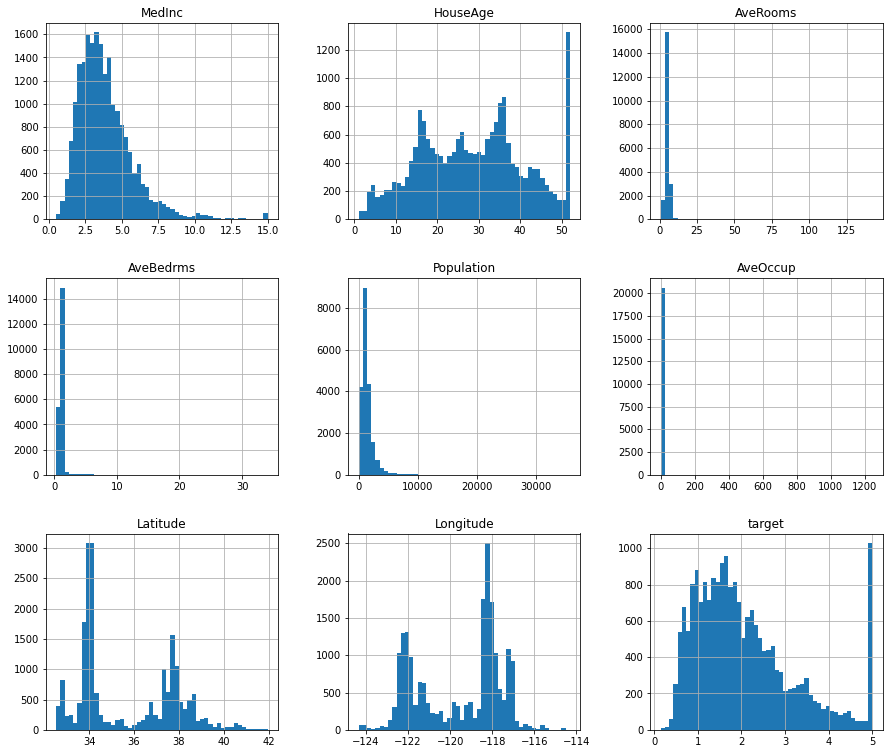

In [6]:
import matplotlib.pyplot as plt

train_x.hist(bins=50, figsize=(15, 13))
plt.savefig('housing_hist.png')
plt.show()

In [7]:
X = train_x[["MedInc"]]
y = train_y

In [8]:
X

,MedInc
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462
...,...
20635,1.5603
20636,2.5568
20637,1.7000
20638,1.8672


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [11]:
X_test

,MedInc
14740,4.1518
10101,5.7796
20566,4.3487
2670,2.4511
15709,5.0049
...,...
13132,4.0516
8228,1.2321
3948,3.6296
8522,5.5133


In [12]:
reg.fit(X_train, y_train)

LinearRegression()

In [13]:
pred = reg.predict(X_test)

In [14]:
print(len(pred))

5160


In [15]:
y_test

14740    1.369
10101    2.413
20566    2.007
2670     0.725
15709    4.600
         ...  
13132    1.212
8228     1.375
3948     1.609
8522     2.273
16798    2.656
Length: 5160, dtype: float64

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.45125914622544183

## すべてのデータで学習する

In [30]:
california_housing = fetch_california_housing()
train_x = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
train_y = pd.Series(california_housing.target)

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, random_state=0)

In [31]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
19226,7.3003,19.0,7.961600,1.137600,1926.0,3.081600,38.46,-122.68
14549,5.9547,18.0,6.547325,1.102881,547.0,2.251029,32.95,-117.24
9093,3.2125,19.0,5.207547,1.216981,314.0,2.962264,34.68,-118.27
12213,6.9930,13.0,6.428571,1.000000,120.0,2.857143,33.51,-117.18
12765,2.5162,21.0,4.429348,1.036685,1735.0,2.357337,38.62,-121.41
...,...,...,...,...,...,...,...,...
13123,4.4125,20.0,6.000000,1.045662,712.0,3.251142,38.27,-121.26
19648,2.9135,27.0,5.349282,0.933014,647.0,3.095694,37.48,-120.89
9845,3.1977,31.0,3.641221,0.941476,704.0,1.791349,36.58,-121.90
10799,5.6315,34.0,4.540598,1.064103,1052.0,2.247863,33.62,-117.93


In [32]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14740,4.1518,22.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05
10101,5.7796,32.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97
20566,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84
2670,2.4511,37.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60
15709,5.0049,25.0,4.319261,1.039578,649.0,1.712401,37.79,-122.43
...,...,...,...,...,...,...,...,...
13132,4.0516,8.0,6.201299,1.048996,6002.0,3.543093,38.46,-121.48
8228,1.2321,35.0,3.062257,1.173152,820.0,1.595331,33.77,-118.19
3948,3.6296,16.0,3.616842,0.983158,896.0,1.886316,34.20,-118.61
8522,5.5133,37.0,4.593220,0.889831,355.0,3.008475,33.90,-118.34


In [33]:
y_train

19226    3.81300
14549    3.29300
9093     1.85400
12213    5.00001
12765    0.97500
          ...   
13123    1.44600
19648    1.59400
9845     2.89300
10799    4.84600
2732     0.69400
Length: 15480, dtype: float64

In [34]:
y_test

14740    1.369
10101    2.413
20566    2.007
2670     0.725
15709    4.600
         ...  
13132    1.212
8228     1.375
3948     1.609
8522     2.273
16798    2.656
Length: 5160, dtype: float64

In [35]:
reg.fit(X_train, y_train)

LinearRegression()

In [36]:
#全部入りの精度
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.5911695436410491

In [37]:
y_pred

array([2.27826207, 2.79606672, 1.90887117, ..., 2.15678592, 3.03507742,
       2.89088222])

In [38]:
y_test

14740    1.369
10101    2.413
20566    2.007
2670     0.725
15709    4.600
         ...  
13132    1.212
8228     1.375
3948     1.609
8522     2.273
16798    2.656
Length: 5160, dtype: float64

In [39]:
y_pred2 = reg.predict(X_train)

In [40]:
r2_score(y_train, y_pred2)

0.6109633715458154

In [43]:
california_housing = fetch_california_housing()
train_x = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
train_y = pd.Series(california_housing.target)

## 特徴量エンジニアリング＆データクリーニング

In [17]:
pip install seaborn

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.datasets import fetch_california_housing

In [129]:
housing = fetch_california_housing()
df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
df_housing['Price'] = housing.target
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [130]:
df_housing.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [131]:
df_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [132]:
from sklearn.model_selection import train_test_split
X = df_housing.drop(['Price'], axis=1)
y = df_housing['Price'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16512, 8)
(16512,)
(4128, 8)
(4128,)


In [134]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80


In [135]:
y_train.head()

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
Name: Price, dtype: float64

In [136]:
train_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)


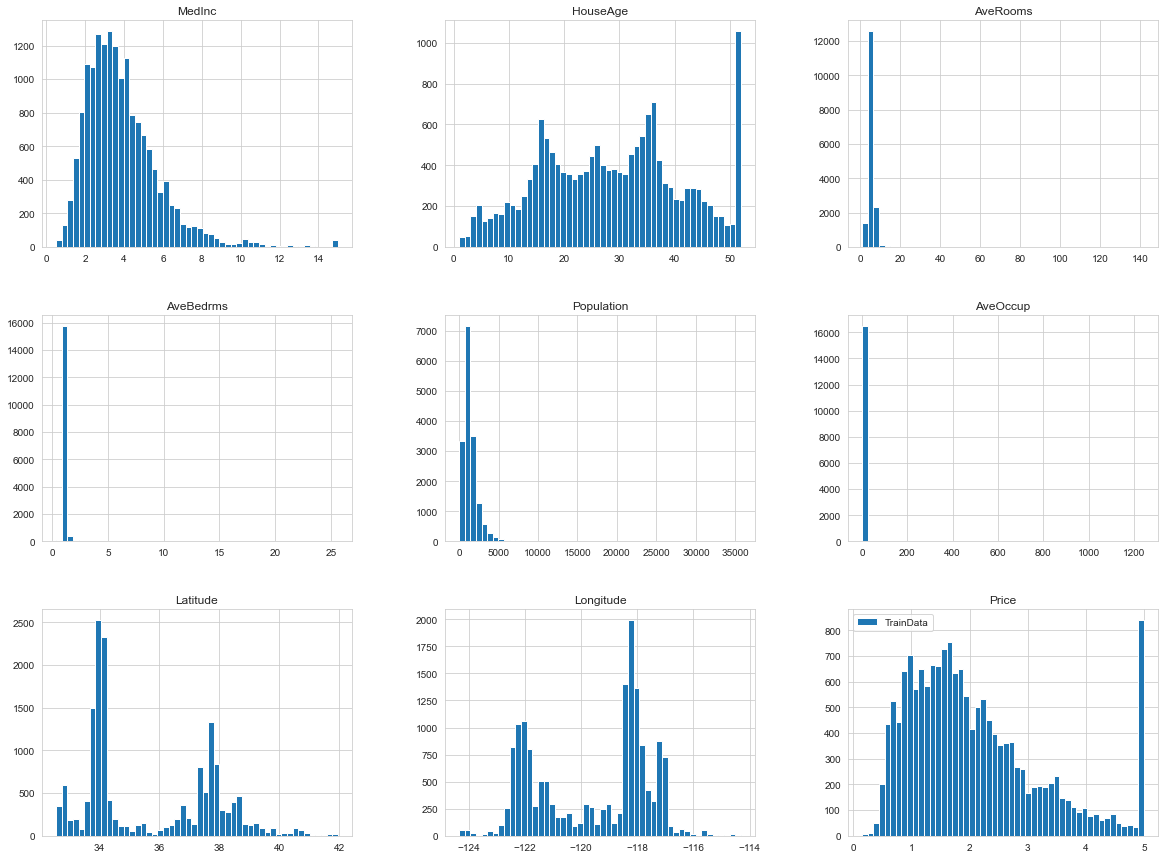

In [137]:
train_set.hist(bins=50, figsize=(20, 15), label='TrainData')
plt.legend()
plt.savefig('train_hist.png')
plt.show()

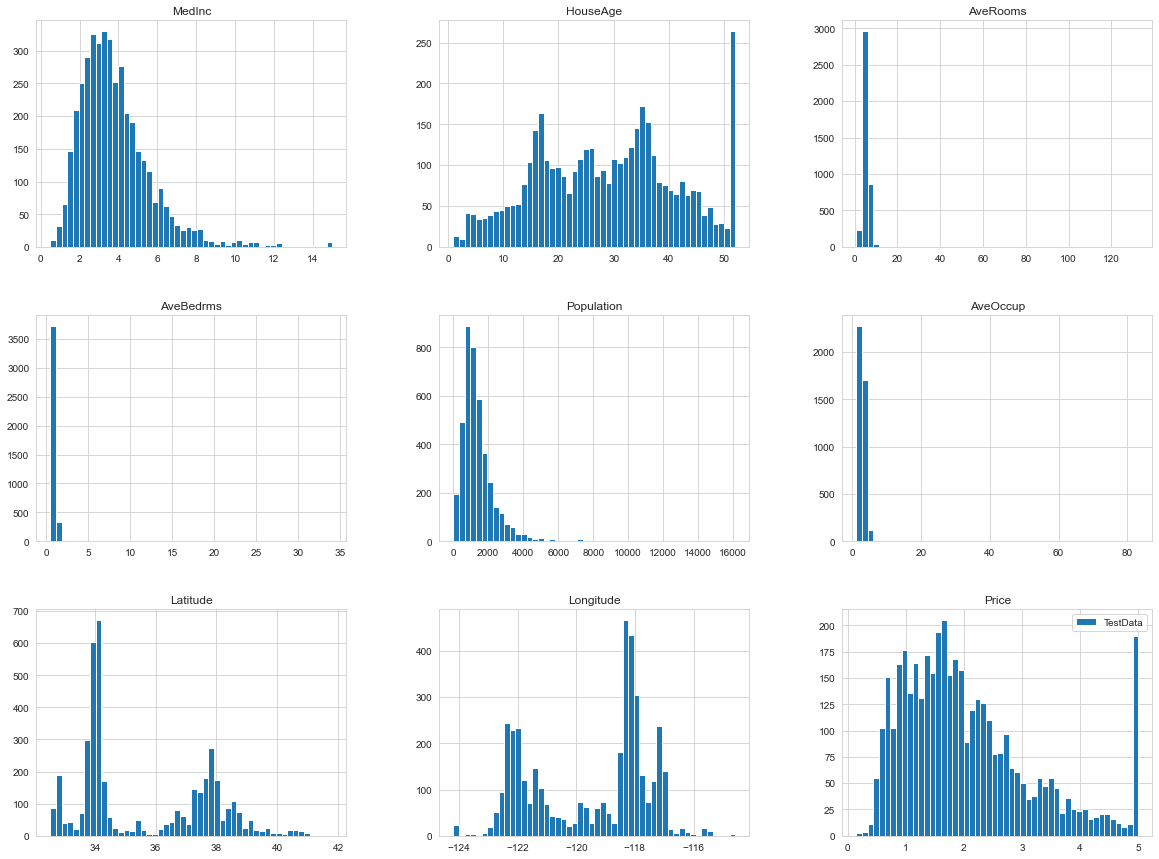

In [138]:
test_set.hist(bins=50, figsize=(20, 15), label='TestData')
plt.legend()
plt.savefig('test_hist.png')
plt.show()

In [139]:
housing_sample = train_set.copy()
housing_sample.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03,1.030
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16,3.821
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48,1.726
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11,0.934
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80,0.965


In [140]:
ave_columns = ['AveRooms', 'AveBedrms', 'AveOccup']

for col in ave_columns:
    housing_sample[col] = np.round(housing_sample[col])

housing_sample.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
14196,3.2596,33.0,5.0,1.0,2300.0,4.0,32.71,-117.03,1.030
8267,3.8125,49.0,4.0,1.0,1314.0,2.0,33.77,-118.16,3.821
17445,4.1563,4.0,6.0,1.0,915.0,3.0,34.66,-120.48,1.726
14265,1.9425,36.0,4.0,1.0,1418.0,4.0,32.69,-117.11,0.934
2271,3.5542,43.0,6.0,1.0,874.0,2.0,36.78,-119.80,0.965


In [141]:
housing_sample.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.880754,28.608285,5.430959,1.045422,1426.453004,3.102229,35.643149,-119.582290,2.071947
std,1.904294,12.602499,2.404361,0.435392,1137.056380,11.579199,2.136665,2.005654,1.156226
min,0.499900,1.000000,1.000000,0.000000,3.000000,1.000000,32.550000,-124.350000,0.149990
25%,2.566700,18.000000,4.000000,1.000000,789.000000,2.000000,33.930000,-121.810000,1.198000
50%,3.545800,29.000000,5.000000,1.000000,1167.000000,3.000000,34.260000,-118.510000,1.798500
75%,4.773175,37.000000,6.000000,1.000000,1726.000000,3.000000,37.720000,-118.010000,2.651250
max,15.000100,52.000000,142.000000,26.000000,35682.000000,1243.000000,41.950000,-114.310000,5.000010


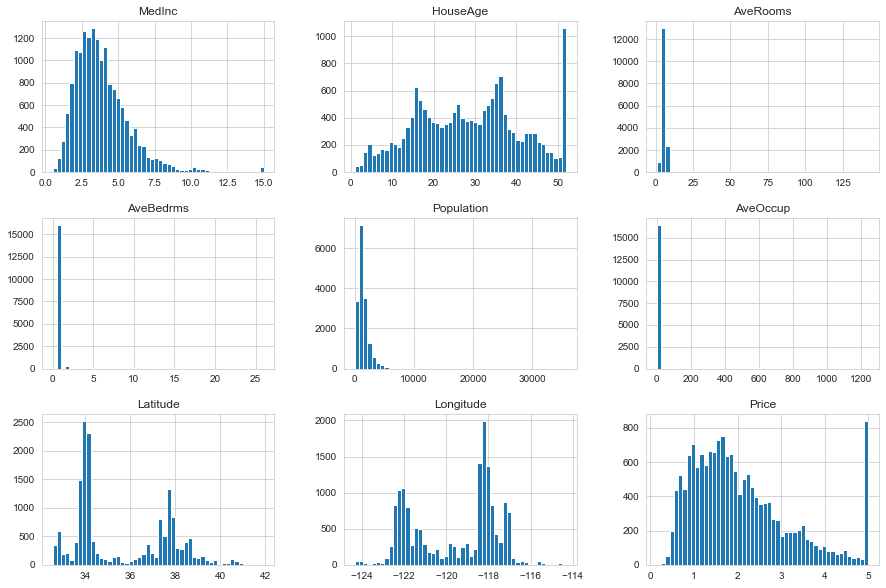

In [142]:
housing_sample.hist(bins=50, figsize=(15, 10))
plt.savefig('sample_hist.png')
plt.show()

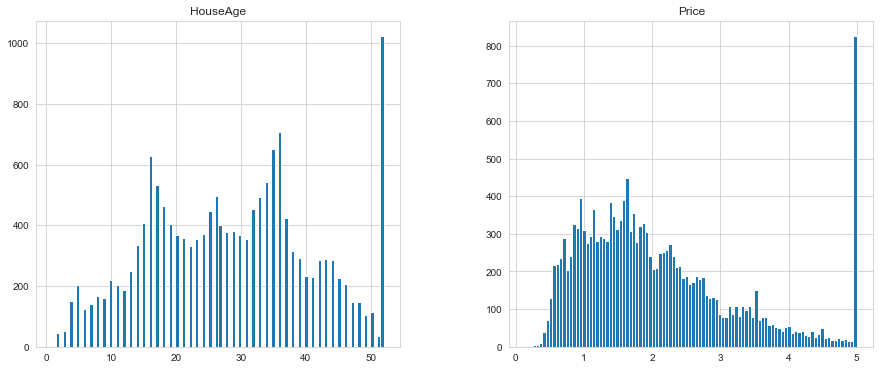

In [143]:
housing_sample[['HouseAge', 'Price']].hist(bins=100, figsize=(15, 6))
plt.savefig('house_price_hist.png')
plt.show()

In [144]:
housing_sample[['HouseAge', 'Price']].describe()

,HouseAge,Price
count,16512.000000,16512.000000
mean,28.608285,2.071947
std,12.602499,1.156226
min,1.000000,0.149990
25%,18.000000,1.198000
50%,29.000000,1.798500
75%,37.000000,2.651250
max,52.000000,5.000010


In [145]:
housing_sample = housing_sample[housing_sample['HouseAge'] < 52]
housing_sample = housing_sample[housing_sample['Price'] < 5]

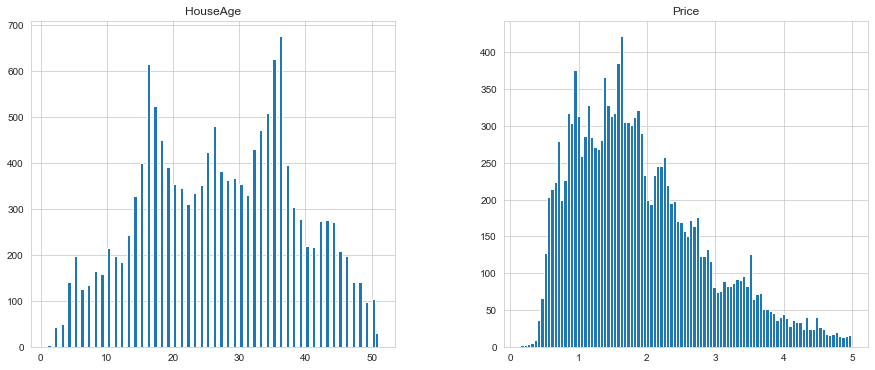

In [146]:
housing_sample[['HouseAge', 'Price']].hist(bins=100, figsize=(15, 6))
plt.savefig('house_price_del_hist.png')
plt.show()

In [147]:
housing_sample.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,14832.000000,14832.000000,14832.000000,14832.000000,14832.000000,14832.000000,14832.000000,14832.000000,14832.000000
mean,3.698343,26.933657,5.387608,1.047600,1472.348840,3.141114,35.606286,-119.497554,1.893327
std,1.571901,11.436305,2.199120,0.408955,1168.621944,12.064158,2.149228,1.983274,0.953274
min,0.499900,1.000000,1.000000,0.000000,3.000000,1.000000,32.550000,-124.300000,0.149990
25%,2.536950,17.000000,4.000000,1.000000,813.750000,2.000000,33.920000,-121.580000,1.153000
50%,3.477300,27.000000,5.000000,1.000000,1206.000000,3.000000,34.250000,-118.460000,1.711000
75%,4.632450,36.000000,6.000000,1.000000,1783.000000,3.000000,37.680000,-117.970000,2.435250
max,15.000100,51.000000,62.000000,15.000000,35682.000000,1243.000000,41.950000,-114.310000,4.991000


In [148]:
housing_sample.shape, train_set.shape

((14832, 9), (16512, 9))

In [149]:
housing_sample.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,14832.000000,14832.000000,14832.000000,14832.000000,14832.000000,14832.000000,14832.000000,14832.000000,14832.000000
mean,3.698343,26.933657,5.387608,1.047600,1472.348840,3.141114,35.606286,-119.497554,1.893327
std,1.571901,11.436305,2.199120,0.408955,1168.621944,12.064158,2.149228,1.983274,0.953274
min,0.499900,1.000000,1.000000,0.000000,3.000000,1.000000,32.550000,-124.300000,0.149990
25%,2.536950,17.000000,4.000000,1.000000,813.750000,2.000000,33.920000,-121.580000,1.153000
50%,3.477300,27.000000,5.000000,1.000000,1206.000000,3.000000,34.250000,-118.460000,1.711000
75%,4.632450,36.000000,6.000000,1.000000,1783.000000,3.000000,37.680000,-117.970000,2.435250
max,15.000100,51.000000,62.000000,15.000000,35682.000000,1243.000000,41.950000,-114.310000,4.991000


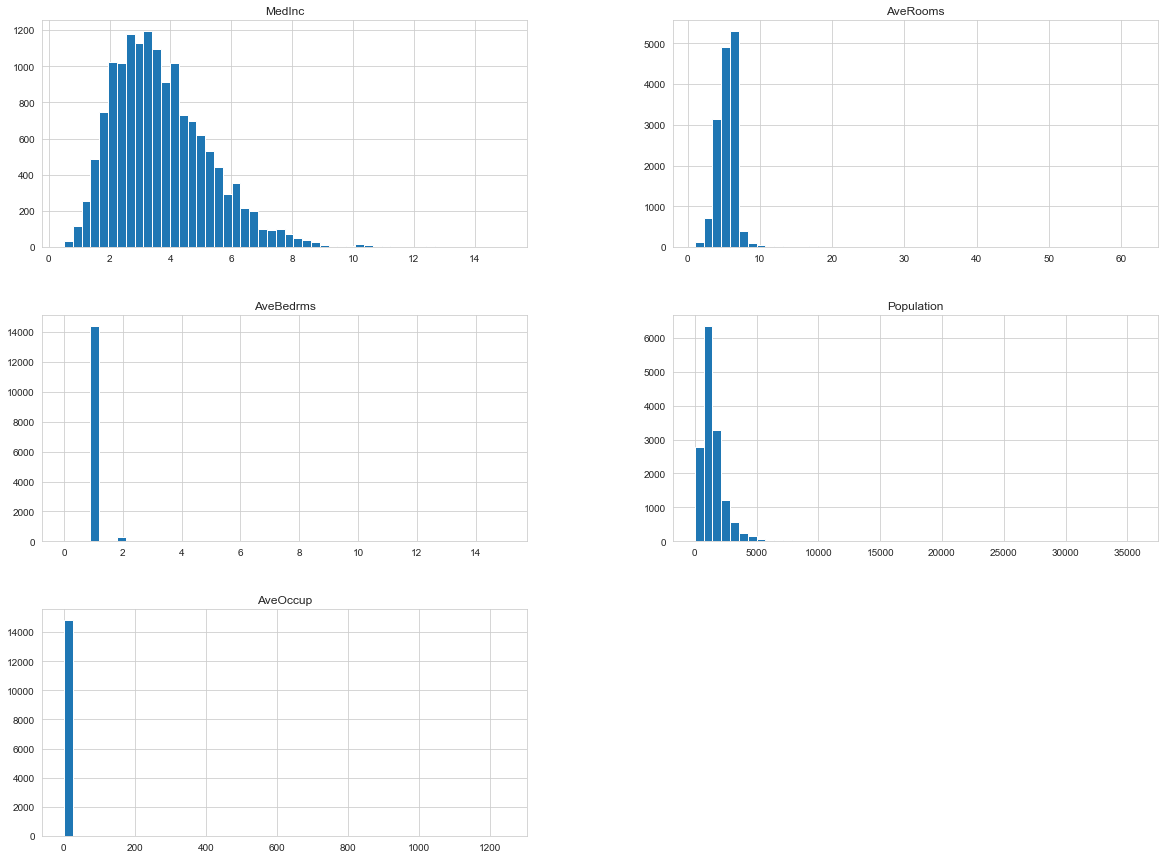

In [150]:
housing_sample[['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']].hist(bins=50, figsize=(20, 15))
plt.savefig('outlier_1.png')
plt.show()

In [151]:
test_population = housing_sample['Population'].copy()
test_population.describe()

count    14832.000000
mean      1472.348840
std       1168.621944
min          3.000000
25%        813.750000
50%       1206.000000
75%       1783.000000
max      35682.000000
Name: Population, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_2052\3781609166.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_population, kde=False, fit=norm, fit_kws={'label': 'Normal Distribution'})


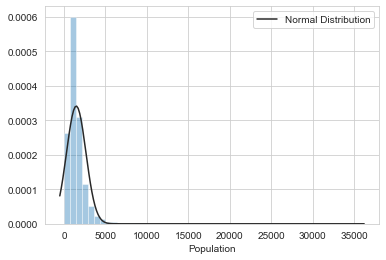

In [152]:
from scipy.stats import norm
sns.distplot(test_population, kde=False, fit=norm, fit_kws={'label': 'Normal Distribution'})
plt.legend()
plt.savefig('test_population.png')
plt.show()

In [153]:
std_2 = test_population.std() * 2
std_p = test_population.mean() + std_2
std_m = test_population.mean() - std_2
print('平均値:{}'.format(test_population.mean()))
print('標準偏差×２:{}'.format(std_2))
print('最大値:{}'.format(std_p))
print('最小値:{}'.format(std_m))
print('\n')
print('実際の最大値:{}'.format(test_population.max()))

平均値:1472.3488403451995
標準偏差×２:2337.24388857909
最大値:3809.592728924289
最小値:-864.8950482338903


実際の最大値:35682.0


In [154]:
mean = test_population.mean()
std = test_population.std()
 # 平均値で引いた値をnp.abs()で絶対値に置き換え標準偏差で割る
boder = np.abs(test_population - mean) / std
boder.head()


14196    0.708228
8267     0.135500
17445    0.476928
14265    0.046507
2271     0.512012
Name: Population, dtype: float64

In [155]:
test_population = test_population[(boder < 2)]
test_population.describe()

count    14299.000000
mean      1318.964053
std        731.485954
min          3.000000
25%        799.000000
50%       1176.000000
75%       1696.500000
max       3806.000000
Name: Population, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_2052\3614278352.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_population, kde=False, fit=norm, fit_kws={'label': 'Normal Distribution'})


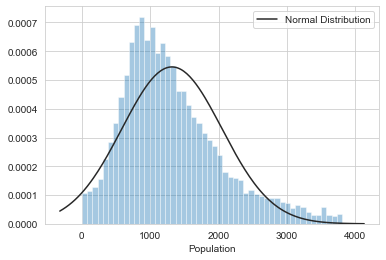

In [156]:
sns.distplot(test_population, kde=False, fit=norm, fit_kws={'label': 'Normal Distribution'})
plt.legend()
plt.savefig('test_population_outlier.png')
plt.show()

In [157]:
columns = housing_sample[['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']].columns

for col in columns:
    mean = housing_sample[col].mean()
    std = housing_sample[col].std()
    boder = np.abs(housing_sample[col] - mean) / std
    housing_sample = housing_sample[(boder < 2)]

housing_sample.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,13258.000000,13258.000000,13258.000000,13258.0,13258.000000,13258.000000,13258.000000,13258.000000,13258.000000
mean,3.540192,27.853975,5.116307,1.0,1338.679439,2.942525,35.608190,-119.527367,1.838252
std,1.338638,11.226394,1.081385,0.0,722.380721,0.758359,2.143903,1.971874,0.900362
min,0.643300,1.000000,1.000000,1.0,6.000000,1.000000,32.550000,-124.300000,0.149990
25%,2.503500,18.000000,4.000000,1.0,821.000000,2.000000,33.930000,-121.590000,1.136000
50%,3.395800,29.000000,5.000000,1.0,1193.000000,3.000000,34.250000,-118.460000,1.688000
75%,4.473200,36.000000,6.000000,1.0,1710.000000,3.000000,37.677500,-118.010000,2.355750
max,6.841900,51.000000,9.000000,1.0,3822.000000,5.000000,41.950000,-114.550000,4.991000


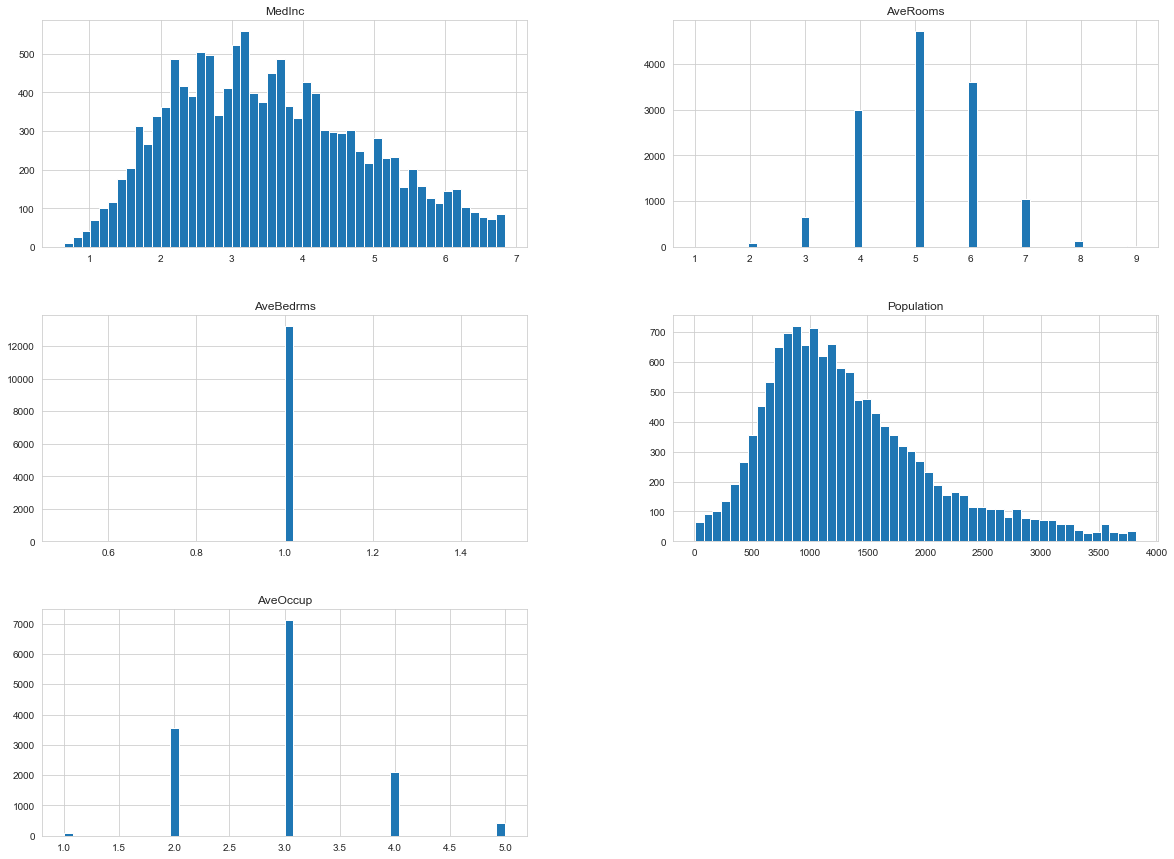

In [158]:
housing_sample[['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']].hist(bins=50, figsize=(20, 15))
plt.savefig('all_outlier.png')
plt.show()

In [159]:
housing_sample.corr()['Price'].sort_values()

AveOccup     -0.258252
Latitude     -0.177601
Longitude    -0.018615
Population    0.010828
HouseAge      0.048966
AveRooms      0.186584
MedInc        0.611532
Price         1.000000
AveBedrms          NaN
Name: Price, dtype: float64

In [160]:
sns.regplot('Price', 'MedInc', data=housing_sample, scatter_kws={'alpha': 0.4}, line_kws={'color': 'red'})
plt.savefig('med_correlation.png')
plt.show()

TypeError: regplot() got multiple values for argument 'data'

In [161]:
sns.regplot('Price', 'AveOccup', data=housing_sample, scatter_kws={'alpha': 0.4}, line_kws={'color': 'red'})
plt.savefig('occ_correlation.png')
plt.show()

TypeError: regplot() got multiple values for argument 'data'

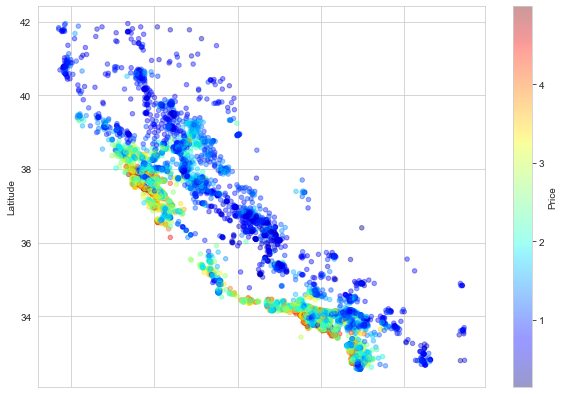

In [162]:
# 実行

housing_sample.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.4,
             figsize=(10, 7),
             c='Price', cmap=plt.get_cmap('jet'), colorbar=True)

plt.savefig('longitude_latitude_is_price.png')
plt.show()

<Figure size 1080x936 with 0 Axes>

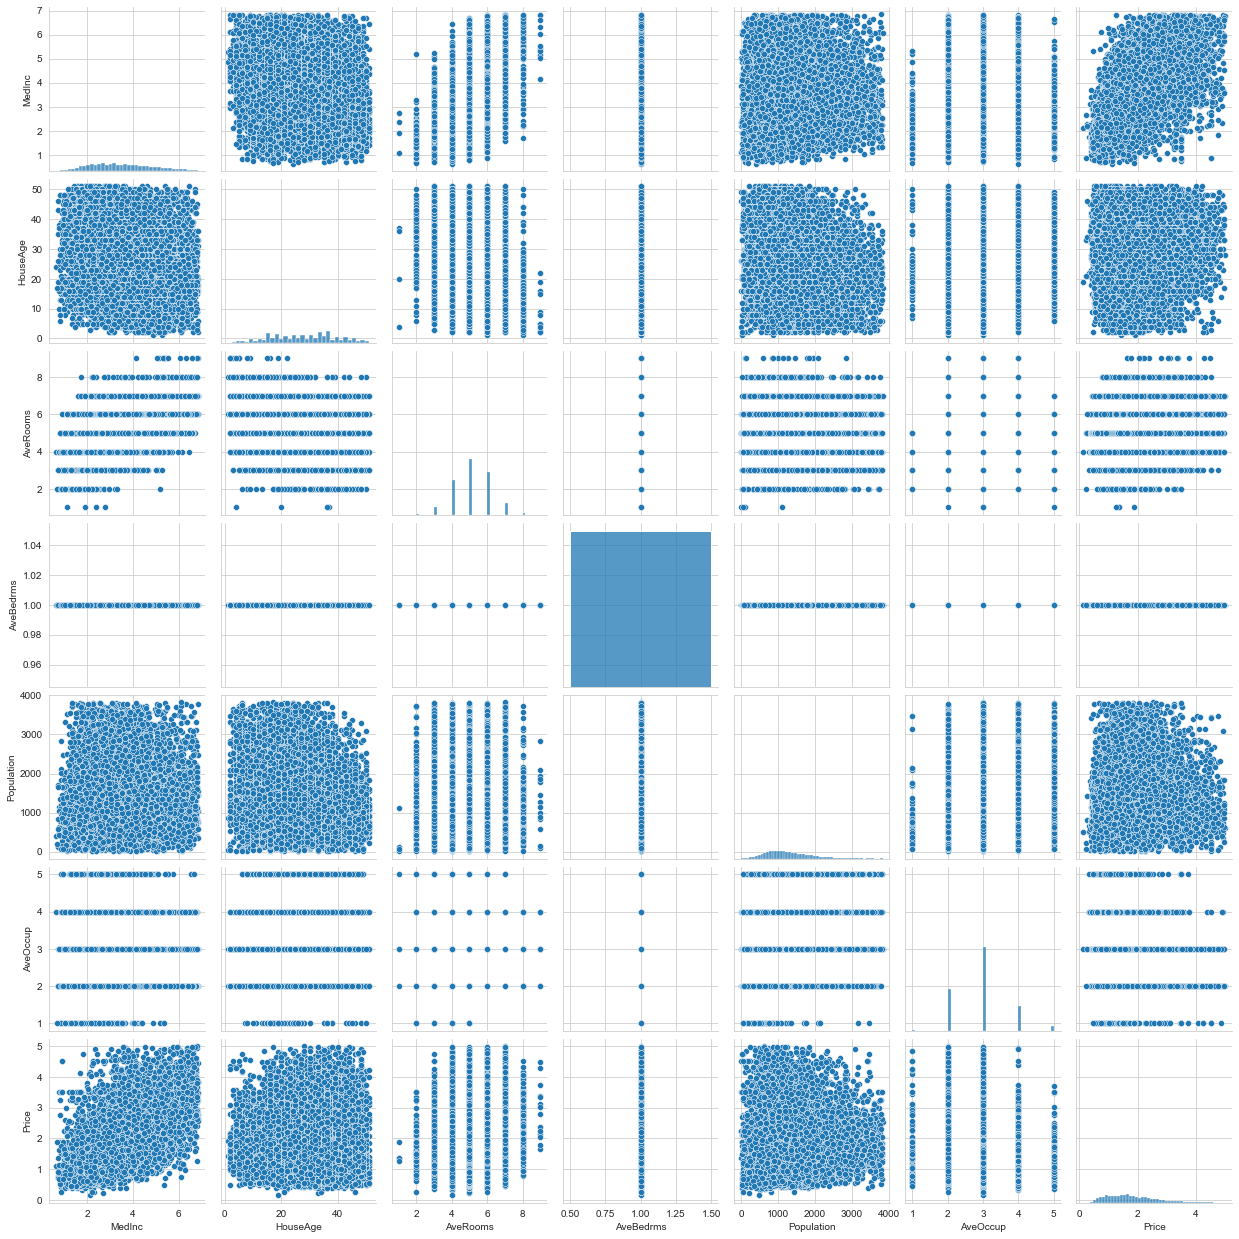

In [163]:
plt.figure(figsize=(15, 13))
sns.pairplot(housing_sample.drop(['Latitude', 'Longitude'], axis=1))
plt.savefig('all_correlation.png')
plt.show()

In [164]:
housing_sample['Bedrms_per_Rooms'] = housing_sample['AveBedrms'] / housing_sample['AveRooms']
housing_sample.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,Bedrms_per_Rooms
14196,3.2596,33.0,5.0,1.0,2300.0,4.0,32.71,-117.03,1.030,0.200000
8267,3.8125,49.0,4.0,1.0,1314.0,2.0,33.77,-118.16,3.821,0.250000
17445,4.1563,4.0,6.0,1.0,915.0,3.0,34.66,-120.48,1.726,0.166667
14265,1.9425,36.0,4.0,1.0,1418.0,4.0,32.69,-117.11,0.934,0.250000
2271,3.5542,43.0,6.0,1.0,874.0,2.0,36.78,-119.80,0.965,0.166667


In [165]:
housing_sample.corr()['Price'].sort_values()

AveOccup           -0.258252
Latitude           -0.177601
Bedrms_per_Rooms   -0.127661
Longitude          -0.018615
Population          0.010828
HouseAge            0.048966
AveRooms            0.186584
MedInc              0.611532
Price               1.000000
AveBedrms                NaN
Name: Price, dtype: float64

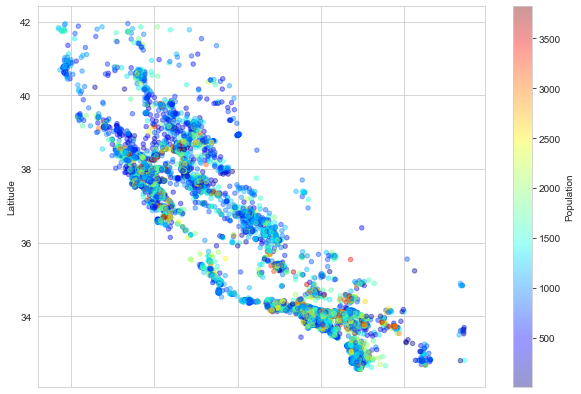

In [166]:
housing_sample.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.4,
             figsize=(10, 7),
             c='Population', cmap=plt.get_cmap('jet'), colorbar=True)

plt.savefig('longitude_latitude_is_population.png')
plt.show()

In [167]:
def category(df):
    if df < 600:
        # 少ない
        return 'few'
    elif df > 3000:
        # 多い
        return 'many'
    else:
        # 普通
        return 'usually'

In [168]:
housing_sample['Population_Feature'] = housing_sample['Population'].apply(category)
housing_sample.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,Bedrms_per_Rooms,Population_Feature
14196,3.2596,33.0,5.0,1.0,2300.0,4.0,32.71,-117.03,1.030,0.200000,usually
8267,3.8125,49.0,4.0,1.0,1314.0,2.0,33.77,-118.16,3.821,0.250000,usually
17445,4.1563,4.0,6.0,1.0,915.0,3.0,34.66,-120.48,1.726,0.166667,usually
14265,1.9425,36.0,4.0,1.0,1418.0,4.0,32.69,-117.11,0.934,0.250000,usually
2271,3.5542,43.0,6.0,1.0,874.0,2.0,36.78,-119.80,0.965,0.166667,usually
17848,6.6227,20.0,6.0,1.0,2695.0,3.0,37.42,-121.86,2.648,0.166667,usually
6252,2.5192,28.0,4.0,1.0,1355.0,3.0,34.04,-117.97,1.573,0.250000,usually
6113,1.5000,5.0,4.0,1.0,819.0,3.0,34.13,-117.90,1.398,0.250000,usually
8364,2.2303,25.0,3.0,1.0,1710.0,3.0,33.97,-118.35,1.594,0.333333,usually
9448,2.8750,13.0,6.0,1.0,750.0,2.0,37.46,-119.72,0.960,0.166667,usually


In [169]:
feature_dummies = pd.get_dummies(housing_sample['Population_Feature'], dtype=np.uint8, drop_first=True)
feature_dummies.head()

,many,usually
14196,0,1
8267,0,1
17445,0,1
14265,0,1
2271,0,1


In [170]:
housing_sample = pd.concat([housing_sample, feature_dummies], axis=1)
housing_sample.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,Bedrms_per_Rooms,Population_Feature,many,usually
14196,3.2596,33.0,5.0,1.0,2300.0,4.0,32.71,-117.03,1.030,0.200000,usually,0,1
8267,3.8125,49.0,4.0,1.0,1314.0,2.0,33.77,-118.16,3.821,0.250000,usually,0,1
17445,4.1563,4.0,6.0,1.0,915.0,3.0,34.66,-120.48,1.726,0.166667,usually,0,1
14265,1.9425,36.0,4.0,1.0,1418.0,4.0,32.69,-117.11,0.934,0.250000,usually,0,1
2271,3.5542,43.0,6.0,1.0,874.0,2.0,36.78,-119.80,0.965,0.166667,usually,0,1


In [171]:
housing_sample_corr = housing_sample.copy()
housing_sample_corr = housing_sample_corr.drop(['Population_Feature'], axis=1)
housing_sample_corr.corr()['Price'].sort_values()

AveOccup           -0.258252
Latitude           -0.177601
Bedrms_per_Rooms   -0.127661
Longitude          -0.018615
usually            -0.002524
many                0.003439
Population          0.010828
HouseAge            0.048966
AveRooms            0.186584
MedInc              0.611532
Price               1.000000
AveBedrms                NaN
Name: Price, dtype: float64

In [172]:
from sklearn.preprocessing import StandardScaler

housing_Med = housing_sample['MedInc'].copy()

 # 初期化
scaler = StandardScaler()

 # pandasのSeriesだと１次元配列になっているためnumpyのreshape()で２次元配列にする
standardization_3 = scaler.fit_transform(np.array(housing_Med).reshape(-1, 1))

 # もしくわ
 # scaler.fit(np.array(housing_Med).reshape(-1, 1))
 # standardization_3 = scaler.transform(np.array(housing_Med).reshape(-1, 1))

print('平均:{0}、分散:{1}'.format(np.round(standardization_3.mean()), np.round(standardization_3.std())))

平均:-0.0、分散:1.0


C:\Users\user\AppData\Local\Temp\ipykernel_2052\225090923.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_Med, kde=False, label='Before', ax=ax1)
C:\Users\user\AppData\Local\Temp\ipykernel_2052\225090923.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(standardization_3, kde=False

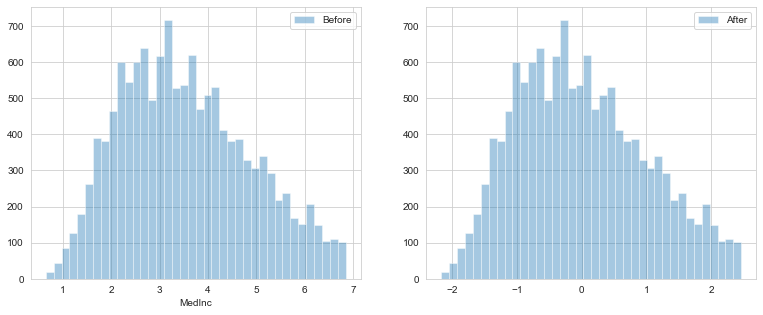

In [173]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

sns.distplot(housing_Med, kde=False, label='Before', ax=ax1)
sns.distplot(standardization_3, kde=False, label='After', ax=ax2)
ax1.legend()
ax2.legend()
plt.savefig('Before_After.png')
plt.show()

In [179]:
def round_number(df):
    """
    指定された属性の値を四捨五入し整数に置き換える
    """
    ave_columns = ['AveRooms', 'AveBedrms', 'AveOccup']

    for col in ave_columns:
        df[col] = np.round(df[col])

    return df


def std_exclude(df):
    """
    標準偏差の２倍以上の値は取り除く
    """
    columns = df[['MedInc', 'AveRooms', 'Population', 'AveOccup']].columns

    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        boder = np.abs(df[col] - mean) / std
        df = df[(boder < 2)]

    return df


def category(df):
    """
    その区域の人口は、少ない（few）か、普通（usually）か、多い（many）か。
    大体のの区域では600人から3000人ということから、この範囲を指標とする。
    """
    if df < 600:
        return 'few'
    elif df > 3000:
        return 'many'
    else:
        return 'usually'


""" 上３つの関数をまとめたカスタム変換器"""
def custom_conversion(dataframe):
    df = dataframe.copy()
    df = round_number(df)

    # サンプルの調査ミスとして取り除く
    df = df[df['HouseAge'] < 52]

    # サンプルの調査ミスとして取り除く
    df = df[df['Price'] < 5]
    df = std_exclude(df)

    # 平均部屋数に対して平均寝室数を比較する
    df['Bedrms_per_Rooms'] = df['AveBedrms'] / df['AveRooms']
    df['Population_Feature'] = df['Population'].apply(category)

    # カテゴリー属性をダミー変数化する
    feature_dummies = pd.get_dummies(df['Population_Feature'], drop_first=True, dtype=np.uint8)
    df = pd.concat([df, feature_dummies], axis=1)

    # Xを説明変数、yを目的変数に代入しておく
    X = df.drop(['AveBedrms', 'Price', 'Population_Feature'], axis=1)
    y = df['Price']

    return X, y

In [180]:
X, y = custom_conversion(train_set)

In [181]:
X.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,Bedrms_per_Rooms,many,usually
14196,3.2596,33.0,5.0,2300.0,4.0,32.71,-117.03,0.200000,0,1
8267,3.8125,49.0,4.0,1314.0,2.0,33.77,-118.16,0.250000,0,1
17445,4.1563,4.0,6.0,915.0,3.0,34.66,-120.48,0.166667,0,1
14265,1.9425,36.0,4.0,1418.0,4.0,32.69,-117.11,0.250000,0,1
2271,3.5542,43.0,6.0,874.0,2.0,36.78,-119.80,0.166667,0,1


In [182]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_s = scaler.fit_transform(X)


In [183]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_s, y)

LinearRegression()

In [184]:
from sklearn.metrics import mean_squared_error

lin_train_pred = lin_reg.predict(X_s)
lin_train_mse = mean_squared_error(y, lin_train_pred)
lin_train_rmse = np.sqrt(lin_train_mse)
print('訓練データの誤差:{:2f}'.format(lin_train_rmse))

訓練データの誤差:0.575462


TypeError: residplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 720x576 with 0 Axes>

In [186]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
result = lin_reg.score(X_s, y)

In [187]:
result

0.5932435241950731